# Practica N◦7: Entrenamiento, validaci ́on y testeo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn.linear_model import LinearRegression    
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures    
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline

from formulaic import Formula


preguntas:
1. b,c
2. a
3.  f

### Ejercicio 1



Queremos estudiar la relación entre la longitud de la aleta de un pinguino y el peso del pinguino.
Como en una esfera, el peso es proporcional a la longitud del radio elevada al cubo, podemos
conjeturar que un polinomio de grado 3 es apropiado para ajustar el peso en función de la
longitud de la aleta. Queremos verificar si nuestra conjetura tiene sustento en los datos.

#### (a) Datos faltantes. 


Ejecutar el siguiente código y observar si hay filas con datos faltantes
(NaN)

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


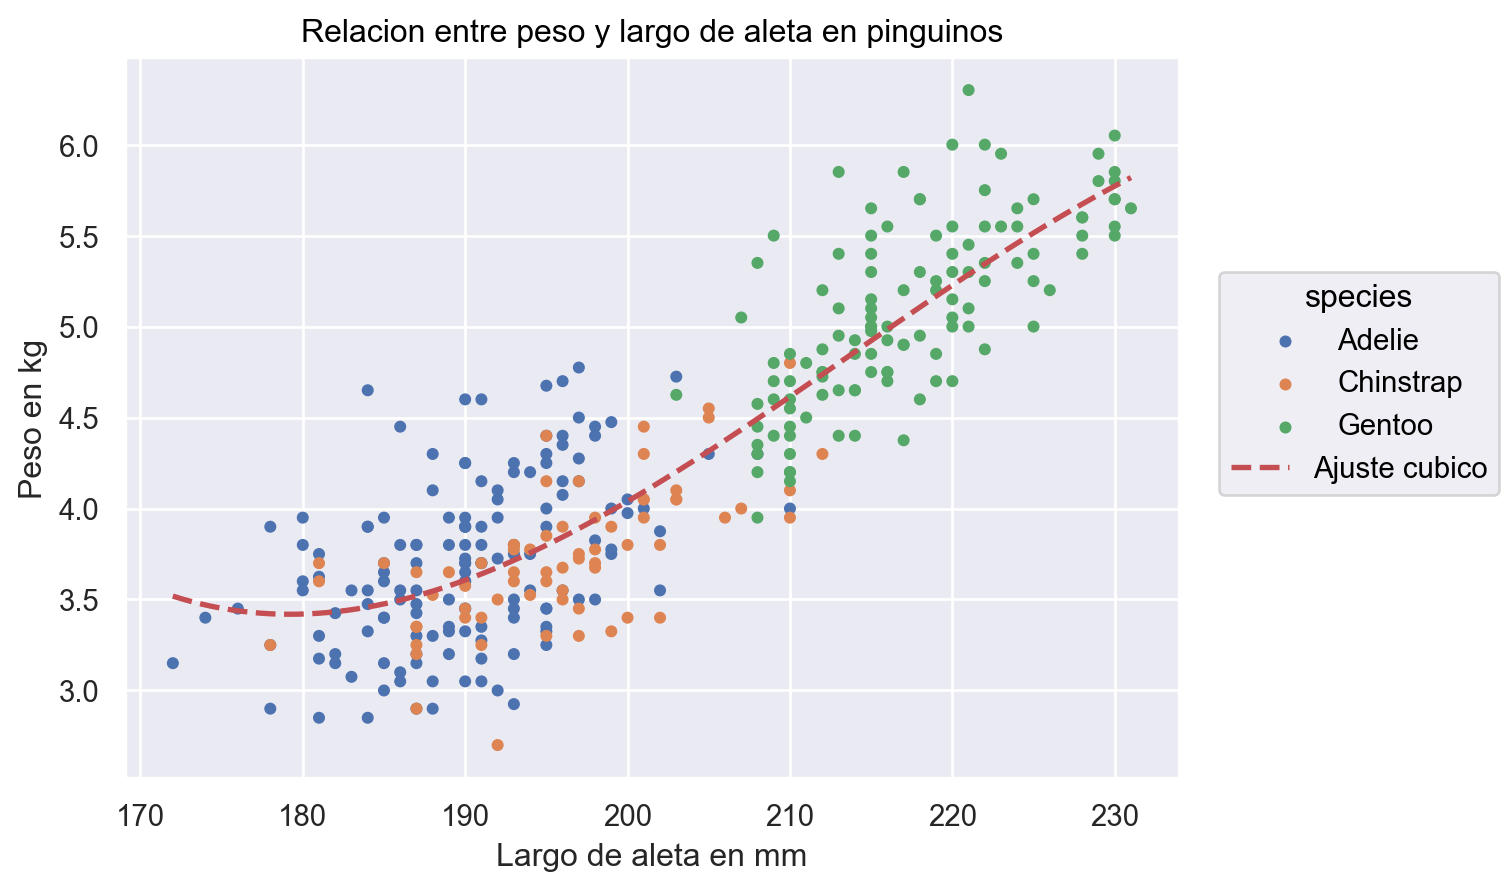

In [3]:
(
    so.Plot(penguins, x=penguins['flipper_length_mm'], y=penguins['body_mass_g']/1000)
    .add(so.Dot(pointsize=4), color="species", size="sex")
    .add(so.Line(linestyle='dashed', color="r", linewidth=2), so.PolyFit(3), label="Ajuste cubico")
    .label(title="Relacion entre peso y largo de aleta en pinguinos",
           x='Largo de aleta en mm',
           y='Peso en kg')
)

In [4]:
penguins.isnull().values.any()

np.True_

Existen valores nulos, usamos `dropna()` para eliminar filas con valores faltantes y verificamos:

In [5]:
penguins = penguins.dropna()
penguins.isnull().values.any()

np.False_

No hay filas con valores NaN.

#### (b) Conjuntos de entrenamiento y testeo. 


Dividir el dataset resultante en un grupo de
entrenamiento y uno de testeo (80% - 20%) utilizando la función `train_test_split` de
sklearn:

In [6]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.2, random_state=42)

En este codigo, `random_state` se conoce también como semilla aleatoria. Si corremos
varias veces el código con el mismo número, obtendremos siempre la misma muestra.
Esto permite que el experimento sea reproducible. Si modificamos el número (o no lo
indicamos), obtendremos distitnas muestras aleatorias.

Podemos también separar primero las variables explicativas y variable respuesta:

In [7]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
# preguntar si se usaba -1 porque despues tengo que usar fit_intercept=False en LinearReg
X = penguins[['flipper_length_mm']] # esto tiene que ir con doble corchete, sino es series no dataframe!!!
y = penguins['body_mass_g']
X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size =0.2, random_state =42)


#### (c) 
Crear y ajustar 3 modelos utilizando polinomios de grados 1, 2 y 3.

In [9]:
modelo_1 = LinearRegression(fit_intercept = False)
modelo_1.fit(X_train, y_train)  

y_pred_train_1 = modelo_1.predict(X_train)
y_pred_test_1 = modelo_1.predict(X_test)

In [10]:
# pregunta si es asi, lo tuve que buscar 
modelo_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo_2.fit(X_train, y_train)  
 
y_pred_train_2 = modelo_2.predict(X_train)
y_pred_test_2 = modelo_2.predict(X_test)


In [11]:
modelo_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
modelo_3.fit(X_train, y_train)   

y_pred_train_3 = modelo_3.predict(X_train)
y_pred_test_3 = modelo_3.predict(X_test)

#### (d) 
Calcular para cada uno el error predicción en el grupo de entrenamiento y en el grupo de
test.

In [12]:
ecm_test_1 = mean_squared_error(y_test, y_pred_test_1)
print('Raiz cuadarada del ECM de testeo de modelo_1: ', np.sqrt(ecm_test_1))
ecm_test_2 = mean_squared_error(y_test, y_pred_test_2)
print('Raiz cuadarada del ECM de testeo de modelo_2: ', np.sqrt(ecm_test_2))
ecm_test_3 = mean_squared_error(y_test, y_pred_test_3)
print('Raiz cuadarada del ECM de testeo de modelo_3: ', np.sqrt(ecm_test_3))

Raiz cuadarada del ECM de testeo de modelo_1:  543.8909523093574
Raiz cuadarada del ECM de testeo de modelo_2:  357.3950554691191
Raiz cuadarada del ECM de testeo de modelo_3:  351.65984875861824


In [13]:
ecm_train_1 = mean_squared_error(y_train, y_pred_train_1)
print('Raiz cuadarada del ECM de entrenamiento de modelo_1: ', np.sqrt(ecm_train_1))
ecm_train_2 = mean_squared_error(y_train, y_pred_train_2)
print('Raiz cuadarada del ECM de entrenamiento de modelo_2: ', np.sqrt(ecm_train_2))
ecm_train_3 = mean_squared_error(y_train, y_pred_train_3)
print('Raiz cuadarada del ECM de entrenamiento de modelo_3: ', np.sqrt(ecm_train_3))

Raiz cuadarada del ECM de entrenamiento de modelo_1:  571.3066507448574
Raiz cuadarada del ECM de entrenamiento de modelo_2:  384.3665322413238
Raiz cuadarada del ECM de entrenamiento de modelo_3:  379.46804168012466


#### (e) 
¿Cuál modelo tiene el menor error (ECM) en el ajuste? ¿Cuál el menor error (ECM) de
predicción?

- Calcular el ECM en el conjunto de entrenamiento → mide qué tan bien el modelo se ajusta a los datos que ya vio.

- Calcular el ECM en el conjunto de testeo → mide qué tan bien predice en datos nuevos (lo que más importa en general)

El de grado 3, no por mucho comparado con el de grado 2

#### (f) 
En base a los resultados obtenidos, ¿Cuál de los tres modelos utilizaría?

In [14]:
r2_score(y_test, y_pred_test_3)

0.803688771247813

Muy buena prediccion! Y no overfitea! :D

### Ejercicio 2


En el archivo `50_startups.csv` tenemos los siguientes datos de 50 compañías: gastos en
investigación y desarrollo, gastos administrativos, gastos en marketing y ganancias. Queremos
estimar las ganancias a partir de los gastos en las distintas  áreas.

#### (a) 
Leer el archivo, y realizar un gráfico de dispersión para cada par de variables. Se pueden
generar todos los gráfico automáticamente con el `pairplot`.

In [15]:
df_startups = pd.read_csv("../../datasets/50_Startups.csv")
df_startups.head()

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


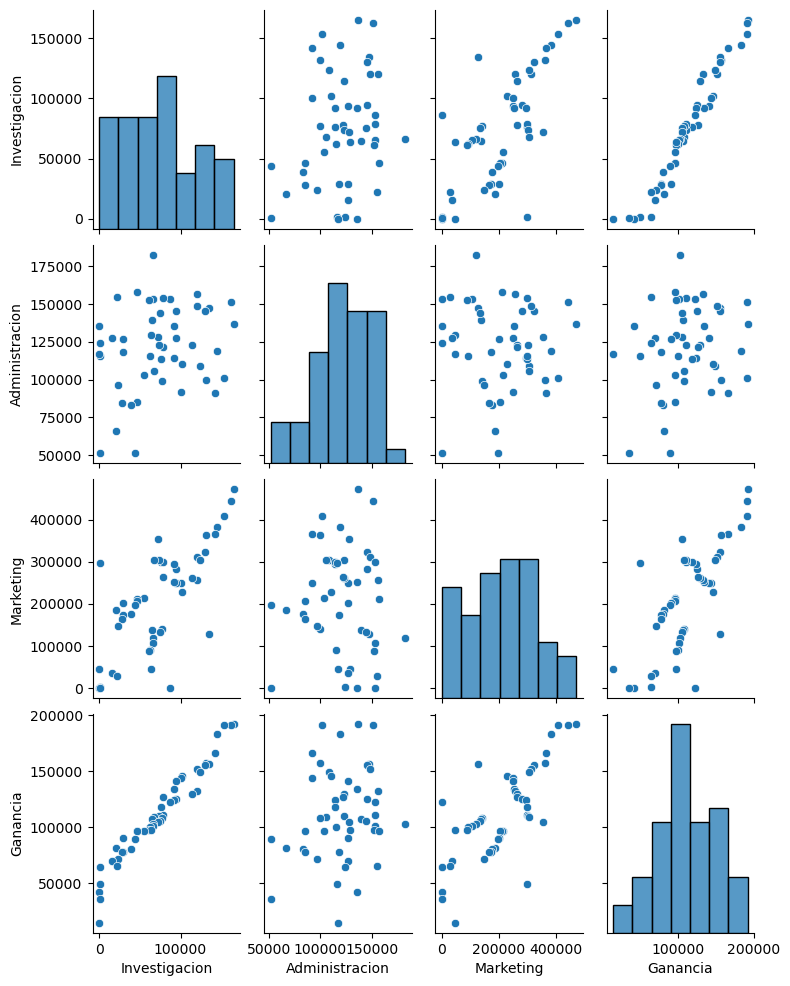

In [16]:
sns.pairplot(
    data=df_startups, aspect = .8)

En base a estos gráfico, si quisiéramos predecir la ganancia mediante un modelo lineal
utilizando una sola variable predictora, ¿cuál variable utilizaría? Diseñar un experimento
para verificar su respuesta.


Por los graficos se puede llegar a la conclusion de que la relacion entre ganancia e investigación esta muy marcada por una tendencia lineal. Luego un modelo lineal seria óptimo en este caso, ajustemos uno y veamos las metricas de bondad del modelo: 

In [17]:
y, X = Formula('Ganancia ~ Investigacion').get_model_matrix(df_startups)

X_train , X_test , y_train , y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train,y_train)
# ahora entiendo, si uso X_test, tengo que usar y_test, porque sino no dan las dimensiones!!!
y_pred = modelo.predict(X_test)

print("R²: ", r2_score(y_test, y_pred))
# da alto porque estamos con ganancias de millones
# => es muy buena prediccion!
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# preguntar si deberia calcular el y_pred con test o train

R²:  0.9265108109341951
RMSE:  7714.334890830185


Entonces basicamente el ajuste lineal es muy bueno, con un R² de 0.93.

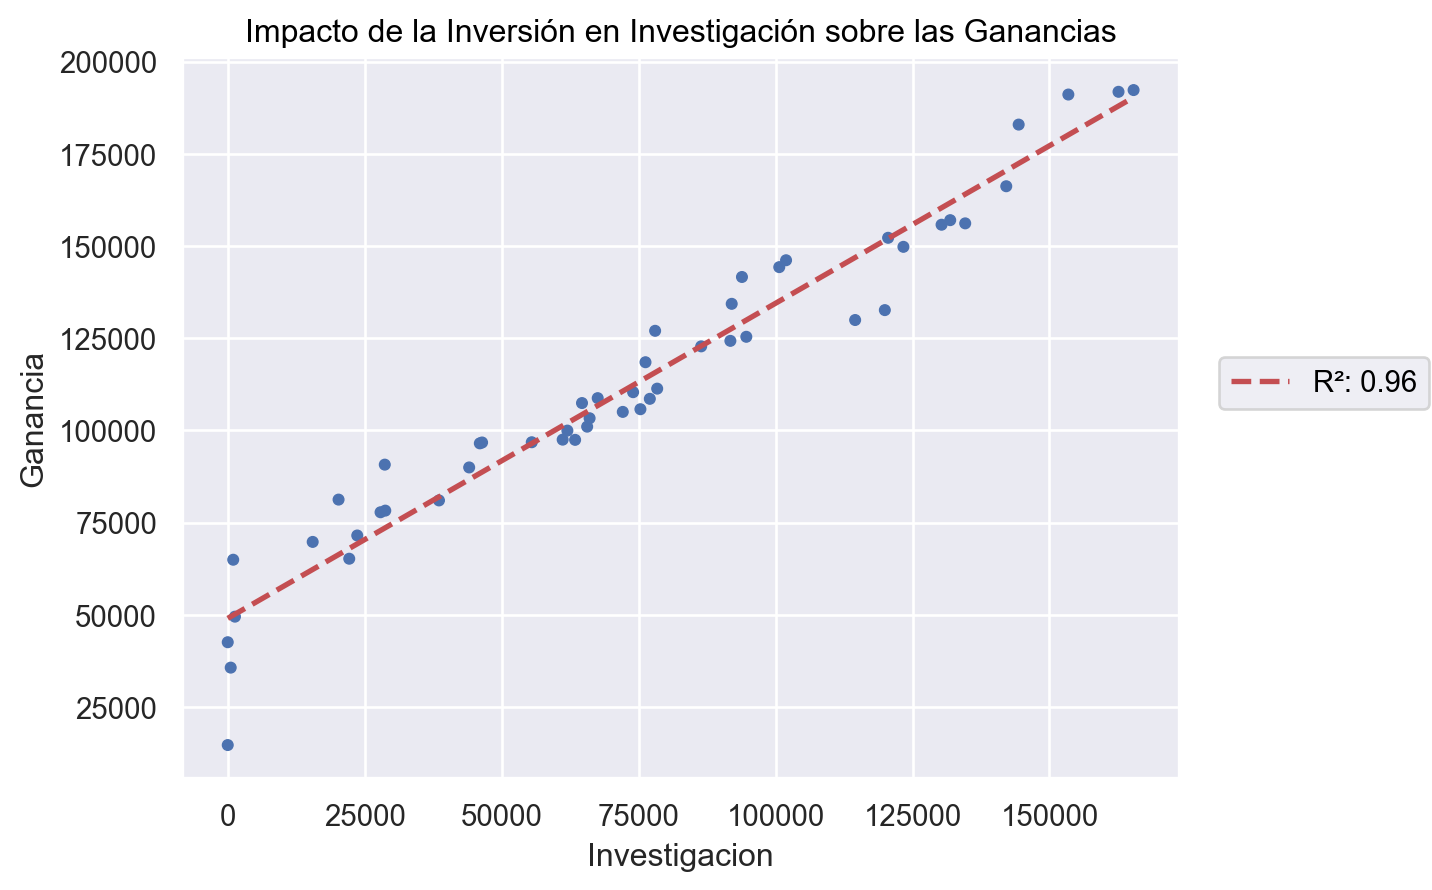

In [18]:
(
    so.Plot(data=df_startups,
            x=df_startups["Investigacion"],
            y=df_startups["Ganancia"])
    .add(so.Dot(pointsize=4))
    .add(so.Line(linestyle="dashed",
                 linewidth=2,
                 color="r"), 
         so.PolyFit(1), 
         label=f"R²: {np.sqrt(r2_score(y_test, y_pred)):.2f}")
    .label(title="Impacto de la Inversión en Investigación sobre las Ganancias")
)

#### (b)
En este ejemplo, ¿considera que un modelo lineal multivariado ayudaría a predecir mejor
la ganancia que el modelo lineal univariado del  item anterior? Realizar un experimento
para verificar su respuesta

Realmente no creo que nos sirva mucho mas un modelo multivariado pues no parece que haya tanta correlacion entre ganancia y las demas variables como con investigacion.
Veamos como ajustaria un modelo como el anterior pero incluyendo la variable de la columna "Marketing":

In [19]:
y, X = Formula('Ganancia ~ Investigacion + Marketing').get_model_matrix(df_startups)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

print("R²: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R²:  0.9168381183550247
RMSE:  8206.328813165852


Como era de esperarse, da peor, veamos como funciona con la olumna administracion y luego veamos con las tres columnas:

In [20]:
y, X = Formula('Ganancia ~ Investigacion + Administracion').get_model_matrix(df_startups)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

print("R²: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R²:  0.8965609365509309
RMSE:  9152.2747823509


Peor R², veamos con las tres:

In [21]:
y, X = Formula('Ganancia ~ Investigacion + Marketing + Administracion').get_model_matrix(df_startups)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

print("R²: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R²:  0.900065308303732
RMSE:  8995.905803361416


Aca mejoro un poco en cuanto al anterior, que tiene sentido pues "Marketing" ayuda a ajustar el error creado por "Administracion".

Podemos concluir que el mejor ajuste lineal lo realiza el modelo univariado con "Investigacion".

### Ejercicio 3


En el Ejercicio 1 no tuvimos en cuenta el sexo del pinguino para predecir el peso, y puede ser una variable importante. Se quiere predecir ahora el peso de un pinguino usando como
variables predictoras el largo de la aleta y el sexo del pinguino (utilizar el DataFrame sin datos
faltantes, como vimos en el **Ejercicio 1 (a)**).


#### (a) 


¿Cuáles son todos los valores que toma la variable “sex”? ¿Qué tipo de variable es:
numérica o categórica, ordinal o nominal? ¿Es una variable binaria?


In [22]:
# creamos el dataset again
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [23]:
penguins['sex'].unique()

array(['Male', 'Female'], dtype=object)

Es una variable categorica nominal, es binaria pues solo toma como valores "Male" y "Female".

#### (b)

 
Escribir (en lápiz y papel) la ecuación de un modelo lineal para este caso. ¿Qué unidades
tienen las variables y cómo se codifica la variable “sexo del pinguino”?


$$peso = \beta_0 + \beta_1 \cdot largo\_aleta  + \beta_2 \cdot sexo$$
donde sexo toma valores $\{0,1\}$ y largo aleta es en mm.

#### (c) Codificaión de variables binarias.


Si utilizamos `Formulaic` para generar la matriz de
datos e incluimos la variable sexo en el modelo, automáticamente va a crear una columna
con el sexo codificado con 0’s y 1’s.


In [24]:
y, X = Formula("body_mass_g ~ flipper_length_mm + sex ").get_model_matrix(penguins)
display(X)

,Intercept,flipper_length_mm,sex[T.Male]
0,1.0,181.0,1
1,1.0,186.0,0
2,1.0,195.0,0
4,1.0,193.0,0
5,1.0,190.0,1
...,...,...,...
338,1.0,214.0,0
340,1.0,215.0,0
341,1.0,222.0,1
342,1.0,212.0,0


#### (d)

 
Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicción (ECM). ¿Considera que agregar la variable “sex”
mejoró el modelo?


In [25]:
modelo = LinearRegression(fit_intercept=False)
modelo.fit(X, y)

y_pred = modelo.predict(X)
data = penguins.copy()
data['predicciones'] = y_pred
print(modelo.coef_[0])
print("RMSE: ", np.sqrt(mean_squared_error(y, data['predicciones'])))

[-5410.30022414    46.98217525   347.85025373]
RMSE:  354.2762094481608


Mejoro bastante, el error cuadratico medio se redujo de 543 a 350, lo cual es casi mejor que el modelo de grado 3 que habiamos calculado en el ejercicio 1, que tenia un ECM de 350.

- Nota: originalmente, lo habia hecho con split train y test, pero no sabia como graficarlo en el siguiente punto por un error de dimension, por lo que decidi hacerlo con todos los datos. En el caso de usar train y test, el ECM era de 309, lo cual es una mejora significativamente mejor (~ 12%).

#### (e)

 
Realizar una visualización apropiada para ver los datos junto con las predicciones del
modelo.


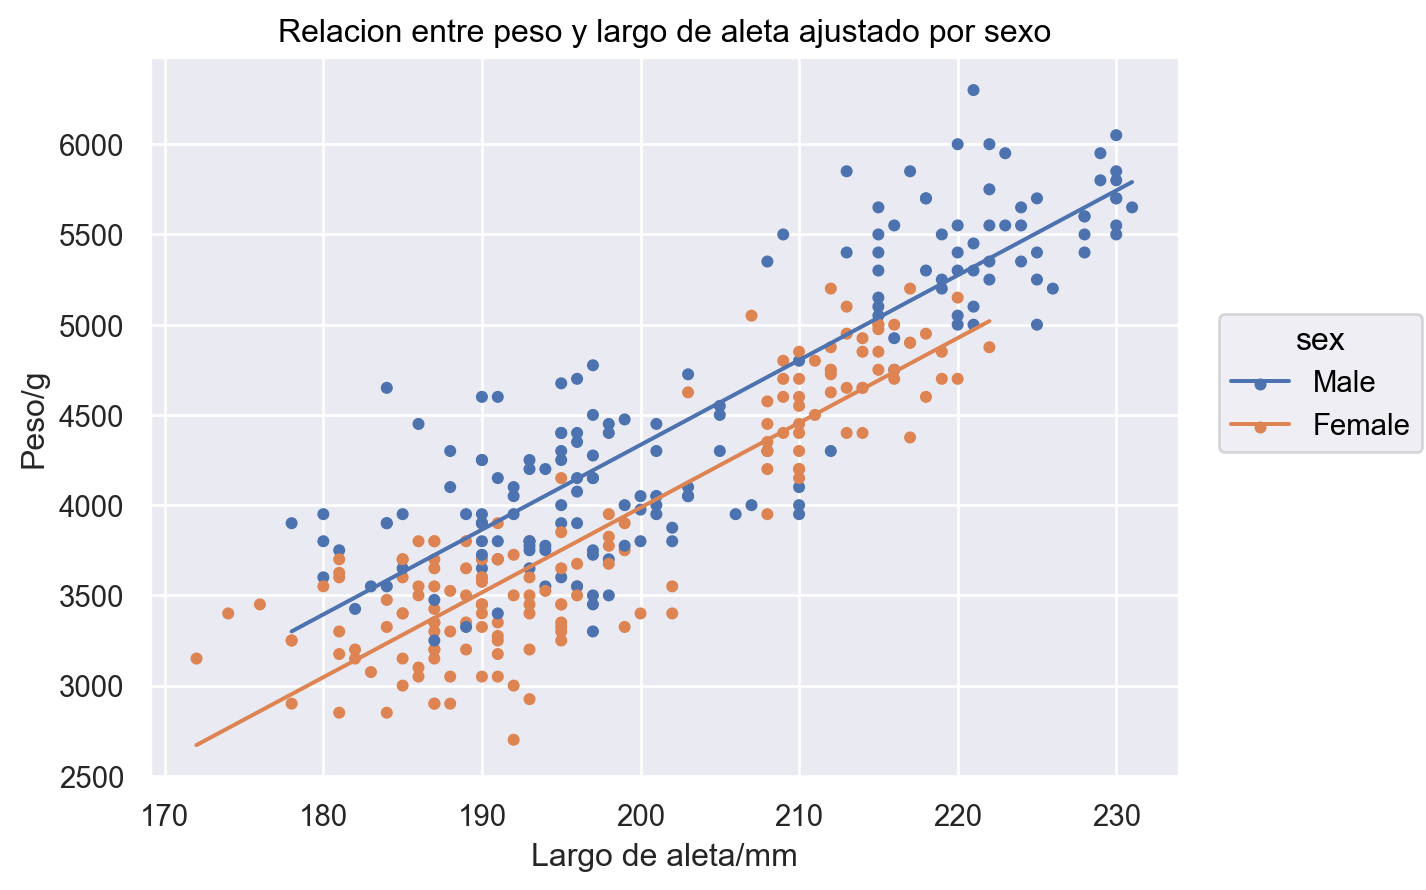

In [26]:
(
    so.Plot(data=data, x="flipper_length_mm", y="body_mass_g", color='sex')
    .add(so.Dot(pointsize=4))
    .add(so.Line(), y='predicciones') 
    .label(title="Relacion entre peso y largo de aleta ajustado por sexo", x="Largo de aleta/mm", y="Peso/g")
)

#### (f) 


Dos pinguinos que tienen igual largo de aleta, uno macho y otro hembra, ¿qué diferencia de peso predice el modelo que tendrán?

El modelo basicamente se resume en 
$$macho = (\beta_0 + \beta_2) + \beta_1 \cdot largo\_aleta   $$
$$hembra = \beta_0 + \beta_1 \cdot largo\_aleta $$
pues sexo vale 1 si es macho, por como eligio Formulaic:

In [27]:
X.columns

Index(['Intercept', 'flipper_length_mm', 'sex[T.Male]'], dtype='object')

Entonces, la diferencia de peso es $\beta_2$!
Viendo los coeficientes..


In [28]:
beta2 = modelo.coef_[0][2]
print(round(beta2)) # total no cambian las decimas de miligramos...

348


Entonces, segun el modelo un macho pesa 348g mas que una hembra.

### Ejercicio 4

Ahora se quiere predecir el peso de un pinguino usando como variables predictoras el largo de
la aleta y la especie del pinguino.


#### (a) 


Trabajamos con la base de pinguinos sin datos faltantes. ¿Cuáles son todos los valores
que toma la variable “species”? ¿Que tipo de variable es: numerica o categorica, ordinal
o nominal? ¿Es una variable binaria?


In [29]:
# creamos el dataset again
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()

penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Es categorica nominal porque no hay un orden intrinseco. En este caso, no es binaria.

#### (b) 


Escribir (en lapiz y papel) la ecuacion de un modelo lineal para este caso. ¿Como se
codifica la variable “especie”?


$$peso = \beta_0 + \beta_1 \cdot largo\_aleta + \beta_2 \cdot es\_Chinstrap + \beta_3 \cdot es\_Gentoo$$
donde es_Chinstrap, es_Gentoo son variables binarias y largo_aleta es en mm.

#### (c) 


Explicar qué diferencia tiene este modelo respecto al propuesto en el ejercicio 1.


Aca tenemos una variable categorica con 3 valores, por lo que tenemos que crear dos variables binarias para poder incluirla en el modelo. En el ejercicio 1 teniamos una variable binaria, por lo que solo teniamos que crear una variable binaria para incluirla en el modelo.

#### (d) Codificación de variables categóricas.


 Si utilizamos `Formulaic` para generar la matriz de datos e incluimos variables categóricas, automáticamente va a crear las columnas
indicadoras con 0’s y 1’s necesarias (variables dummies).


In [30]:
y, X = Formula("body_mass_g ~ flipper_length_mm + species").get_model_matrix(penguins)
X

,Intercept,flipper_length_mm,species[T.Chinstrap],species[T.Gentoo]
0,1.0,181.0,0,0
1,1.0,186.0,0,0
2,1.0,195.0,0,0
4,1.0,193.0,0,0
5,1.0,190.0,0,0
...,...,...,...,...
338,1.0,214.0,0,1
340,1.0,215.0,0,1
341,1.0,222.0,0,1
342,1.0,212.0,0,1


#### (e) 


Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicción.


In [31]:
modelo = LinearRegression(fit_intercept=False)
modelo.fit(X,y)
modelo.coef_[0]

array([-4013.17888796,    40.60616529,  -205.37547984,   284.52360284])

In [32]:
y_pred = modelo.predict(X)
root_mean_squared_error(y, y_pred)

371.03517379275524

#### (f) 


Realizar una visualización apropiada para ver de los datos junto con las predicciones del
modelo.

In [36]:
data = penguins.copy()
data['predicciones'] = y_pred
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,predicciones
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3336.537030
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3539.567856
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3905.023344
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3823.811013
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3701.992517


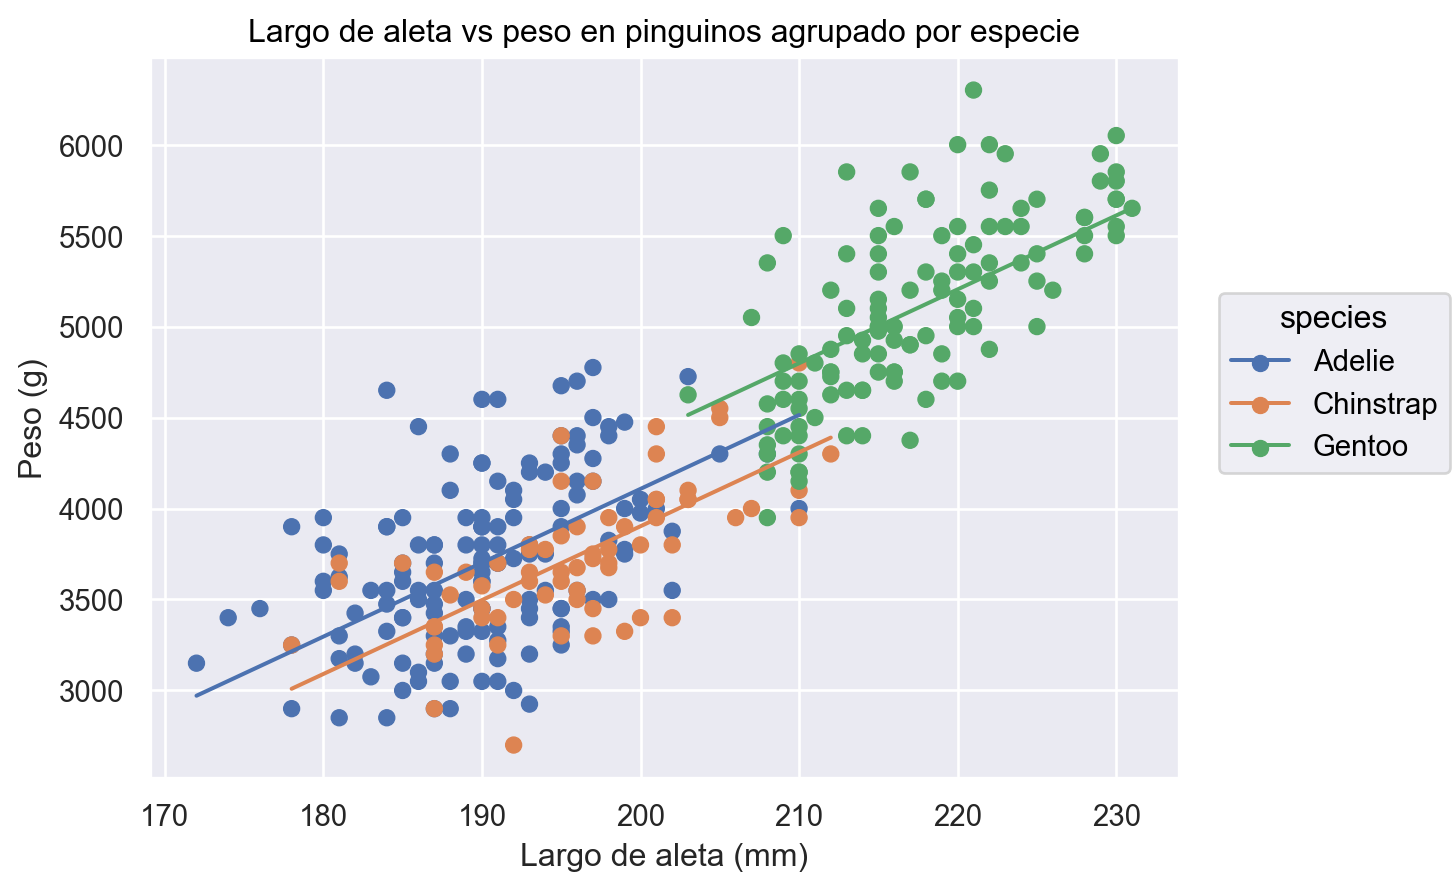

In [ ]:
(
    so.Plot(data=data, x='flipper_length_mm', y='body_mass_g', color='species')
    .add(so.Dot())
    .add(so.Line(), y='predicciones')
    .label(title="Largo de aleta vs peso en pinguinos agrupado por especie",
           x="Largo de aleta (mm)",
           y="Peso (g)")
)

### Ejercicio 5

En este ejercicio trabajaremos con el dataset de inmuebles (`inmuebles.csv`). El objetivo de
este ejercicio es comparar tres modelos lineales para predecir el precio de un inmueble:
- Modelo 1: precio∼superficie
- Modelo 2: precio∼superficie + zona
- Modelo 3: un modelo propuesto por usted

Como medida de comparación utilizaremos la raíz cuadrada del ECM, que notaremos RECM.
En cada  ítem, indicar qué modelo tiene el mejor desempeño.


In [44]:
df_inmuebles = pd.read_csv('../../datasets/inmuebles.csv')
df_inmuebles

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3
...,...,...,...
164,116.0,525.953698,Zona 3
165,118.0,582.190837,Zona 3
166,52.0,200.256009,Zona 1
167,37.0,151.569142,Zona 1



#### (a) Nivel 1. 

Entrenar cada modelo sobre la totalidad de los datos disponibles. Graficar,
en una misma figura, los datos y las predicciones del modelo 2 y del modelo 3. Las
predicciones deben estar señaladas en la leyenda (recuerde el uso del argumento `label`) y
las lineas del modelo 3 deben estar punteadas (investigue agregar `linestyle=’--’` donde
corresponda). Puede adaptar el siguiente código:

In [ ]:
(
    so.Plot(data=data , x='superficie', y='precio')
    .add(so.Dot(), color='zona')
    .add(so.Line(), y=modelo.predict(X).flatten(), color='zona')
)


#### (b) Nivel 2. 


Separar los datos en conjuntos de entrenamiento (train) y prueba (test). Entrenar
cada modelo sobre el mismo conjunto de entrenamiento y comparar su desempeño sobre
el conjunto de prueba.



#### (c) Nivel 3. 


Separar los datos en dos conjuntos: entrenamiento y testeo. Luego, dividir el
conjunto de entrenamiento en dos conjuntos: entrenamiento y validación. Entrenar cada
modelo sobre el conjunto de entrenamiento y comparar su desempeño en el conjunto de
validación. Elija el que usted considere el más apropiado, entrénelo sobre la unión de los
datos de testeo y validación y calcule la RECM y el R2sobre el conjunto de testeo.


#### (d) Nivel 4 - k-Fold Cross-Validation. 


Aplicar validación cruzada en k pliegos con k = 6. Para
esto, separar el conjunto de datos en entrenamiento y testeo. Aplicar la técnica de k-Fold
CV para cada modelo con el conjunto de testeo. Elegir el modelo con menor promedio de
RECM y calcular la RECM y el R² sobre el conjunto de testeo.
3


### Ejercicio 6. Regresión Ridge.


Queremos estimar los gastos en tarjeta de crédito de un conjunto de
clientes a partir de información de los clientes. Utilizamos el dataset `credit.csv`.


(a) 


Cargar el dataset con Pandas. En regresión Ridge variables en distintas escalas pueden
afectar el modelo, por lo tanto es conveniente llevar todas las variables a una misma escala,
por ejemplo, al intervalo $[0,1]$.


(b) 


Separar los datos en entrenamiento y testeo, ajustar un modelo lineal en los datos de
entranamiento y calcular el RMSE (raíz del error cuadrático medio) en los datos datos de
testeo.


(c) 


Obtener por validación cruzada en los datos de entrenamiento el valor óptimo para el
hiperparámetro $α$ de regresión Ridge. Utilizar como vector de búsqueda `alphas =
np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1])`.


(d) 


Con el valor obtenido, ajustar el modelo de regresión Ridge a los datos de entreanamiento.


(e) 


Calcular el RMSE (raíz del error cuadrático medio) en los datos datos de testeo.


(f) 


¿En cuál de los dos modelos obtuvo mejor resultados?